In [171]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the data from the csv file

In [2]:
import pandas as pd

# Loading data from 'data.csv' file into a DataFrame
df = pd.read_csv('data.csv')

# Drop rows with missing values (NaN)
df = df.dropna()

# Print the shape of the DataFrame (number of rows and columns)
print(df.shape)


(1393, 9)


## Calculate the Euclidean norm or the magnitude of the 3D vector representing the magnetic field.

In [3]:
# Extract the components of the magnetic field from the DataFrame
Bx = df["mag_x"]
By = df["mag_y"]
Bz = df["mag_z"]

# Calculate the magnitude of the magnetic field
B = (Bx ** 2 + By ** 2 + Bz ** 2) ** 0.5

# Add the magnitude of the magnetic field as a new column in the DataFrame
df['mag'] = B

## Does the latitude affect the magnetivity?

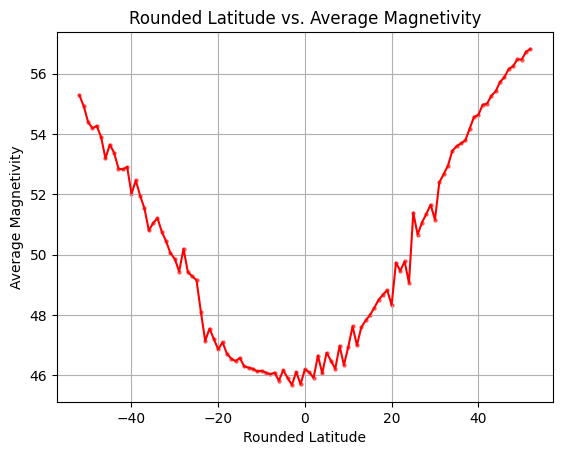

In [161]:
# Set the threshold for grouping latitudes
threshold = 0

# Round the latitude values to the nearest threshold
df['rounded_lat'] = df['lat'].round(decimals=threshold)

# Group data by rounded latitude and calculate the average magnetivity
average_magnetivity = df.groupby('rounded_lat')['mag'].mean().reset_index()

# Scatter plot of latitude vs. average magnetivity
plt.scatter(average_magnetivity['rounded_lat'], average_magnetivity['mag'], s=5, c='r', alpha=0.5)
plt.xlabel('Rounded Latitude')
plt.ylabel('Average Magnetivity')
plt.title('Rounded Latitude vs. Average Magnetivity')

# Add a line through the scatter points
plt.plot(average_magnetivity['rounded_lat'], average_magnetivity['mag'], c='r')

plt.grid(True)
plt.show()



## Graph of function f(x) = 0.005x² + 46 to compare to previous latitude graph


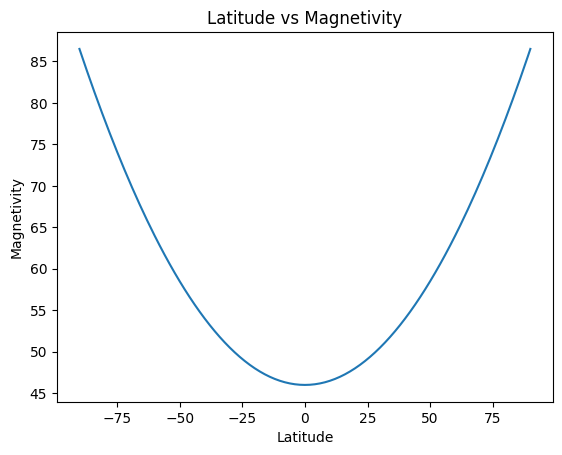

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate x values
x = range(-90, 91)

# Calculate y values using the function f(x) = 0.005x² + 46
y = [0.005 * (i ** 2) + 46 for i in x]

# Create a pandas DataFrame to store the x and y values
data = pd.DataFrame({'Latitude': x, 'Magnetivity': y})

# Plot the data
plt.plot(data['Latitude'], data['Magnetivity'])

# Set plot title and labels
plt.title('Latitude vs Magnetivity')
plt.xlabel('Latitude')
plt.ylabel('Magnetivity')

# Show the plot
plt.show()


## Does the longtitude affect the magnetivity?

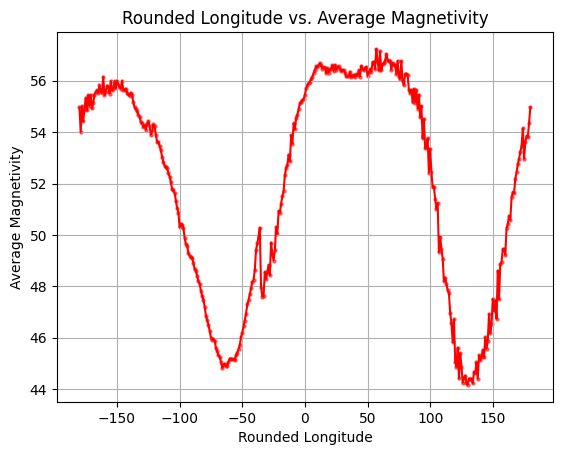

In [170]:

# Set the threshold for grouping longitudes
threshold = 0

# Round the longitude values to the nearest threshold
df['rounded_long'] = df['long'].round(decimals=threshold)

# Group data by rounded longitude and calculate the average magnetivity
average_magnetivity = df.groupby('rounded_long')['mag'].mean().reset_index()

# Scatter plot of longitude vs. average magnetivity
plt.scatter(average_magnetivity['rounded_long'], average_magnetivity['mag'], s=5, c='r', alpha=0.5)
plt.xlabel('Rounded Longitude')
plt.ylabel('Average Magnetivity')
plt.title('Rounded Longitude vs. Average Magnetivity')

# Add a line through the scatter points
plt.plot(average_magnetivity['rounded_long'], average_magnetivity['mag'], c='r')

plt.grid(True)
plt.show()


## How does the day and night cycle affect the magnetivity?

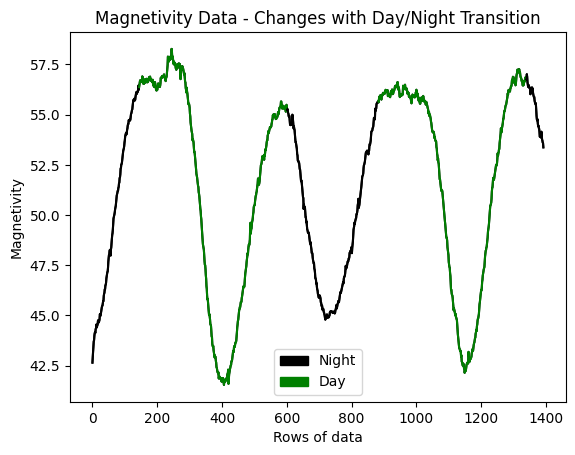

In [181]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

df['DayNight'] = ['Day' if reading == 'Day' else 'Night' for reading in df['day/night']]

# Create a new column 'Transition' to indicate the transition from night to day
df['Transition'] = (df['DayNight'] != df['DayNight'].shift()).astype(int)

# Plotting the graph
plt.plot(df.index, df['mag'], color='black', label='Night')  # Set the line color to black

# Iterate through the transitions and color the segments accordingly
start_idx = None
for idx, transition in df.iterrows():
    if transition['Transition'] == 1:
        if start_idx is not None:
            end_idx = idx - 1
            color = 'green' if df.loc[start_idx, 'DayNight'] == 'Day' else 'black'
            plt.plot(df.index[start_idx:end_idx + 1], df['mag'][start_idx:end_idx + 1], color=color)
        start_idx = idx

# Add the last segment if the data ends on a transition
if start_idx is not None:
    color = 'green' if df.loc[start_idx, 'DayNight'] == 'Day' else 'black'
    plt.plot(df.index[start_idx:], df['mag'][start_idx:], color=color)

# Legend for the line colors
black_patch = mpatches.Patch(color='black', label='Night')
green_patch = mpatches.Patch(color='green', label='Day')
plt.legend(handles=[black_patch, green_patch])

plt.xlabel('Rows of data')
plt.ylabel('Magnetivity')
plt.title('Magnetivity Data - Changes with Day/Night Transition')

plt.show()


## Plotting the ISS path on the world map with different magnetivity level

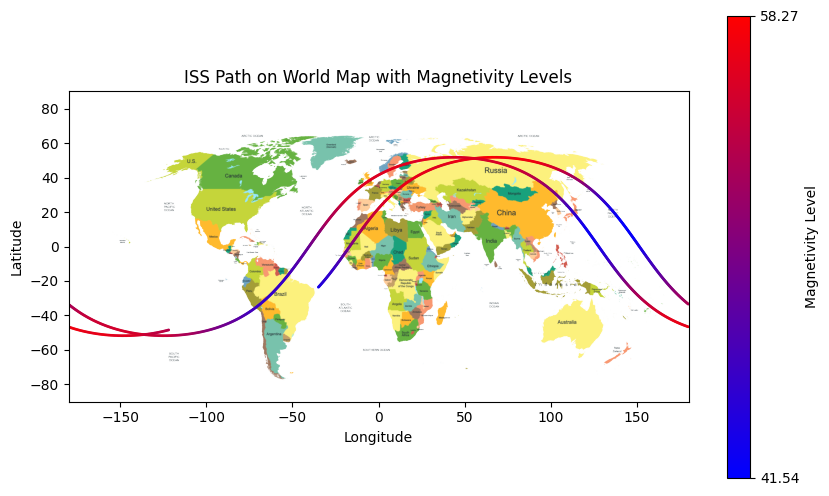

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Assuming you have a DataFrame called df with "long", "lat", "mag_x", "mag_y", and "mag_z" columns containing the ISS data

# Load the world map image
world_map = mpimg.imread('world_map.png')

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the world map image as the background
ax.imshow(world_map, extent=[-180, 180, -90, 90])

# Calculate magnetivity levels using Euclidean distance
mag_levels = np.sqrt(df['mag_x']**2 + df['mag_y']**2 + df['mag_z']**2)

# Normalize the magnetivity levels between 0 and 1
norm_mag = (mag_levels - mag_levels.min()) / (mag_levels.max() - mag_levels.min())

# Create a custom colormap from blue to red
cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, 'blue'), (1, 'red')])

# Scatter plot of longitude and latitude with color-coded line
sc = ax.scatter(df["long"], df["lat"], c=norm_mag, cmap=cmap, marker='o', s=1)

# Set plot title and labels
plt.title("ISS Path on World Map with Magnetivity Levels")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add colorbar with labels
cbar = plt.colorbar(sc, ticks=[0, 1])
cbar.set_label("Magnetivity Level")
cbar.ax.set_yticklabels([f'{mag_levels.min():.2f}', f'{mag_levels.max():.2f}']) # Set the tick labels to magnetivity values
# Set the plot limits based on the longitude and latitude range
plt.xlim(-180, 180)
plt.ylim(-90, 90)

# Display the plot
plt.show()





## Finding the overlapping points in the ISS path from the data collected

    index_i  index_j
0       230     1000
1       230     1001
2       231     1001
3       231     1002
4       232     1002
5       232     1003
6       233     1003
7       601     1370
8       602     1371
9       603     1372
10      604     1373


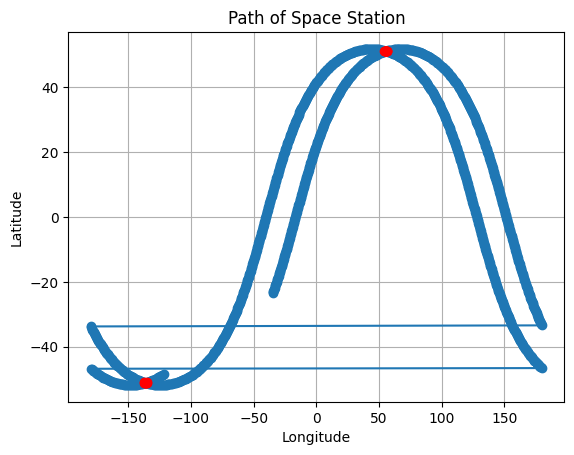

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your data frame is named "df" and has columns "latitude" and "longitude"
# You can load your data frame from a CSV file using pd.read_csv() or create it manually

# Function to calculate the Haversine distance between two points
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of the Earth in kilometers

    # Convert latitude and longitude to radians
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    # Calculate differences
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    # Haversine formula
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # Calculate distance
    distance = R * c
    return distance

# Reset the indices of the df dataframe
df = df.reset_index(drop=True)


# Plot the path using latitude and longitude coordinates
plt.plot(df['long'], df['lat'], '-o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Path of Space Station')
plt.grid(True)

# Find intersection points by examining the graph visually
# You can interactively zoom in on the graph or analyze it programmatically

# Example of programmatically finding intersection points with a distance threshold
threshold_distance = 40.0  # Adjust this threshold based on the distance to identify overlapping regions
intersection_points = []
intersection_indices = []
for i in range(len(df)):
    for j in range(i+1, len(df)):
        lat1, lon1 = df['lat'].iloc[i], df['long'].iloc[i]
        lat2, lon2 = df['lat'].iloc[j], df['long'].iloc[j]
        distance = haversine_distance(lat1, lon1, lat2, lon2)
        if distance < threshold_distance:
            intersection_points.append((lat1, lon1))
            intersection_points.append((lat2, lon2))
            intersection_indices.append((i, j))

# Convert intersection points and indices to data frames
intersection_df = pd.DataFrame(intersection_points, columns=['lat', 'long'])
intersection_indices_df = pd.DataFrame(intersection_indices, columns=['index_i', 'index_j'])

# Print the intersection points and indices
print(intersection_indices_df)

# Show the graph with intersection points highlighted
plt.plot(intersection_df['long'], intersection_df['lat'], 'ro')
plt.show()
